In [73]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn as sk
from __future__ import division
from sklearn.cross_validation import train_test_split
import math

import collections
from tqdm import trange
from sklearn.svm import SVC
import random

In [74]:
# read the excel sheet 
df = pd.read_excel('./BioCode for Machine Learning Updated.xlsx')

# Read in the labels
cls = df['Classification']

# Read the DNA sequences, which are strings comprised of the letters ATCG
seq = df['Aligned Sequence']

Order_group = df['Order_Group']

# O_g = np.array([o_g.split('_') for o_g in Order_group])

species = df['Species']

In [75]:
# Convert DNA data to numpy array, and convert NaNs to Nones
seq = np.array(seq.fillna('None'))

# Create a binary filter to eliminate invalid DNA sequences
valid_idx = np.array([i for i in range(len(seq)) if seq[i] != 'None'])

# Apply the filter
valid_seq = seq[valid_idx]
cls_valid = cls[valid_idx]
cls_valid = np.array(cls_valid)

species = species[valid_idx]

In [77]:
# Seperate string into individual characters
seq_arrays = [np.array([i for i in s]) for s in valid_seq]

mat_size = len(seq_arrays)

print(len(valid_seq), len(cls_valid), mat_size)

4459 4459 4459


In [78]:
list_species = set()
for s in species:
    list_species.add(s)
    
print(len(list_species))

743


In [79]:
species_to_data = collections.defaultdict(list)
for i in range(len(species)):
    species_to_data[species[i]].append((i, cls_valid[i]))

print(list(species_to_data.items())[:5])

del species_to_data[0]

print()

print(list(species_to_data.items())[:5])

print(len(species_to_data.keys()))

[('Rhiniidae_sp', [(973, nan)]), ('Noctuidae_sp', [(3246, nan), (3247, nan), (3513, nan), (3514, nan), (3515, nan), (3516, nan), (3517, nan), (3518, nan), (3519, nan), (3559, nan), (3624, nan), (3625, nan), (3626, nan), (3627, nan), (3628, nan), (3629, nan), (3879, nan), (3881, nan), (3883, nan), (3884, nan), (3885, nan), (3886, nan), (3887, nan), (3888, nan), (3889, nan)]), ('Vanicela_sp', [(4203, nan), (4204, nan), (4205, nan)]), ('Trichopoda_pennipes', [(408, 'Introduced')]), (0, [(3481, nan)])]

[('Rhiniidae_sp', [(973, nan)]), ('Noctuidae_sp', [(3246, nan), (3247, nan), (3513, nan), (3514, nan), (3515, nan), (3516, nan), (3517, nan), (3518, nan), (3519, nan), (3559, nan), (3624, nan), (3625, nan), (3626, nan), (3627, nan), (3628, nan), (3629, nan), (3879, nan), (3881, nan), (3883, nan), (3884, nan), (3885, nan), (3886, nan), (3887, nan), (3888, nan), (3889, nan)]), ('Vanicela_sp', [(4203, nan), (4204, nan), (4205, nan)]), ('Trichopoda_pennipes', [(408, 'Introduced')]), ('Echmepter

In [80]:
for k, v in list(species_to_data.items()):
    # print(v[0])
    # assert False
    if type(v[0][1]) == float and np.isnan(v[0][1]):
        del species_to_data[k]
        # species_to_data[k] = (-1, [i[0] for i in v])
    elif v[0][1] == 'Indigenous':
        species_to_data[k] = (1, [i[0] for i in v])
    else:
        assert v[0][1] == 'Invasive' or v[0][1] == 'Introduced'
        species_to_data[k] = (0, [i[0] for i in v])

    

print(list(species_to_data.items())[:30])

In [82]:
print(len(species_to_data.keys()))

288


In [83]:
testing_set = []
testing_labels = []
training_set = []
training_labels = []
testing_species_id = []

tot_native = 0
tot_invasive = 0
count_native = 0
count_invasive = 0
cur_id = 0

keys =  list(species_to_data.keys())
random.shuffle(keys)

for _, v in [(key, species_to_data[key]) for key in keys]:
    gt, idxs = v
    len_idx = len(idxs)
    # print(len_idx)
    if gt == 0:
        # if tot_invasive > 50 and tot_invasive / (tot_invasive + tot_native) > 0.55:
        #     continue
            
        tot_invasive += 1
        
        if count_invasive > 0:
            training_set += [idxs[0]]
            training_labels += [0]
            # training_set += idxs
            # training_labels += [0 for _ in range(len_idx)]
            count_invasive -= 1
        else:
            testing_set += [idxs[0]]
            testing_labels += [0]
            testing_species_id += [cur_id]
            
            # testing_set += idxs
            # testing_labels += [0 for _ in range(len_idx)]
            # testing_species_id += [cur_id for _ in range(len_idx)]
            # print(len_idx)
            cur_id += 1
            count_invasive += 2
            
    elif gt == 1:
        tot_native += 1
        if count_native > 0:
            training_set += [idxs[0]]
            training_labels += [1]
            # training_set += idxs
            # training_labels += [1 for _ in range(len_idx)]
            count_native -= 1
        else:
            testing_set += [idxs[0]]
            testing_labels += [1]
            testing_species_id += [cur_id]
            
            # print(cur_id)
            # testing_set += idxs
            # print(len_idx)
            # testing_labels += [1 for _ in range(len_idx)]
            # testing_species_id += [cur_id for _ in range(len_idx)]
            count_native += 2
            cur_id += 1

In [84]:
ct= 10
print(testing_set[:ct])
print(testing_labels[:ct])
print(training_set[:ct])
print(training_labels[:ct])
print(testing_species_id[:ct])

[2090, 964, 3303, 1776, 3422, 2263, 4050, 3257, 201, 2155]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[2293, 3085, 626, 1782, 2337, 4440, 3607, 2314, 2174, 3474]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [86]:
tot_invasive / (tot_invasive+tot_native)

0.8819444444444444

In [88]:
seq_arrays = [seq_arrays[i] for i in training_set + testing_set]

print(len(seq_arrays))

288


In [89]:
mat_size = len(seq_arrays)

In [90]:
sim_mat = -np.ones((mat_size, mat_size))

In [91]:
print(mat_size)

288


In [92]:
# Precomputer no dashes
dashes = []
for i in range(mat_size):
    dashes.append(seq_arrays[i] != '-')

In [93]:
try:
    assert False
    sim_mat = np.load('sim_mat.npy')

except:
    # this will take a few minutes
    for i in trange(mat_size):
        # clean up bad data
        a = seq_arrays[i]
        # iterate over DNA sequences and figure out the match
        for j in range(i):
            b = seq_arrays[j]
            match = (a==b)
            valid = (dashes[i] * dashes[j])
            sim_mat[i,j] = np.mean(match[valid])
            sim_mat[j,i] = sim_mat[i,j]
        sim_mat[i,i] = 1
    np.save('sim_mat.npy', sim_mat)

100%|██████████| 288/288 [00:00<00:00, 436.51it/s] 


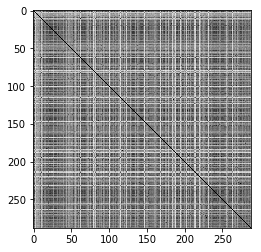

In [95]:
plt.imshow(sim_mat, cmap='Greys')

In [96]:
valid_mat = sim_mat

In [97]:
%%time
u,s,v = np.linalg.svd(valid_mat, full_matrices=0)

Wall time: 45.6 ms


(array([  1.00000000e+00,   0.00000000e+00,   5.00000000e+00,
          3.50000000e+01,   1.83820000e+04,   6.31290000e+04,
          1.32900000e+03,   5.90000000e+01,   2.00000000e+00,
          2.00000000e+00]),
 array([ -2.15522344e-14,  -1.73354689e-14,  -1.31187034e-14,
         -8.90193784e-15,  -4.68517230e-15,  -4.68406768e-16,
          3.74835877e-15,   7.96512430e-15,   1.21818898e-14,
          1.63986554e-14,   2.06154209e-14]),
 <a list of 10 Patch objects>)

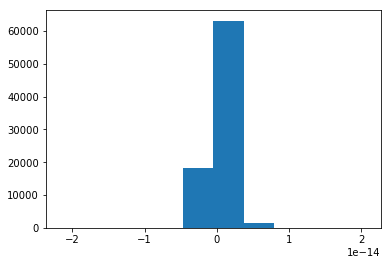

In [98]:
rank = 1000
approx_1000 = u[:,:rank].dot(np.diag(s[:rank])).dot(v[:rank])
errors = ((approx_1000 - valid_mat)/valid_mat)
plt.hist(errors.flatten())

In [99]:
approx = approx_1000

print(approx.shape)

(288, 288)


In [101]:
supervised_X = approx[:len(training_set)]
full_supervised_X = valid_mat[:len(training_set)]
supervised_y = training_labels
test_X = approx[len(training_set):]
full_test_X = valid_mat[len(training_set):]
test_y = testing_labels

assert len(supervised_X) == len(supervised_y)
assert len(test_X) == len(test_y)

In [102]:
print(len(supervised_X) + len(test_X))

288
